In [59]:
import os
import numpy as np
import pandas as pd
from netCDF4 import Dataset

On commence par charger un seul fichier pour faire nos tests ensuite nous prendrons toutes les données NOAA15.

In [60]:
# # ----------------- CECI EST POUR LE PREMIER FICHIER SEULEMENT -----------------
# # Définition du chemin d'accès au fichier unique
# base_folder = "Donnees_Spatiales"
# year_folder = "2020_NOAA_15"
# file_name = "poes_n15_20200101_proc.nc"
# file_path = os.path.join(base_folder, year_folder, file_name)

# # Liste pour accumuler les DataFrames (seulement un dans ce cas)
# df_grouped_grouped_list = []

# print(f"Traitement du fichier : {file_path}")

# try:
#     # Ouvre le fichier NetCDF
#     ds = Dataset(file_path, "r")
    
#     # Extrait les variables
#     data = {
#         "year": ds.variables["year"][:],
#         "day": ds.variables["day"][:],
#         "msec": ds.variables["msec"][:],
#         # Arrondi L_IGRF à une décimale
#         "L_IGRF": np.round(ds.variables["L_IGRF"][:], 1),
#         "p6": ds.variables["mep_pro_tel90_flux_p6"][:]
#     }
    
#     # Crée le DataFrame et l'ajoute à la liste
#     df_file = pd.DataFrame(data)
#     df_list.append(df_file)
    
#     # Ferme le fichier
#     ds.close()
# except FileNotFoundError:
#     print(f"Erreur : Le fichier {file_path} n'a pas été trouvé. Veuillez vérifier le chemin.")
# except Exception as e:
#     print(f"Erreur lors de la lecture du fichier {file_name}: {e}")

# # Concaténer tous les fichiers
# df = pd.concat(df_list, ignore_index=True)
# print("DataFrame global créé avec", len(df), "lignes.")

In [61]:
# ----------------- CECI EST POUR TOUTES LES ANNEES -----------------



# # Dossier principal contenant les sous-dossiers par année
base_folder = "data"
subfolders = [os.path.join(base_folder, f"{year}_NOAA_15") for year in range(2020, 2025)]

# # Liste pour accumuler les DataFrames
df_list = []

for folder in subfolders:
    print(f"Traitement du dossier : {folder}")
    
    for file in os.listdir(folder):
        if file.endswith("_proc.nc"):
            file_path = os.path.join(folder, file)
            try:
                ds = Dataset(file_path, "r")
                
                data = {
                    "year": ds.variables["year"][:],
                    "day": ds.variables["day"][:],
                    "msec": ds.variables["msec"][:],
                    "L_IGRF": np.round(ds.variables["L_IGRF"][:], 1),
                    "p6": ds.variables["mep_pro_tel90_flux_p6"][:]
                }
                
                df_file = pd.DataFrame(data)
                df_list.append(df_file)
                
                ds.close()
            except Exception as e:
                print(f"Erreur sur le fichier {file}: {e}")

# Concaténer tous les fichiers
df = pd.concat(df_list, ignore_index=True)
print("DataFrame global créé avec", len(df), "lignes.")



TypeError: 'Time' object is not callable

In [ ]:
# Convertir msec en timedelta correctement
time = pd.to_datetime(df['year'].astype(str), format='%Y') \
       + pd.to_timedelta(df['day'] - 1, unit='D') \
       + pd.to_timedelta(df['msec'], unit='ms')               #msec depuis minuit 


In [ ]:
df['datetime'] = time

In [ ]:
df.head(10)
#df.to_csv("Donnees_Spatiales/df_noaa15.csv", index=False)

,year,day,msec,L_IGRF,p6,datetime
0,2020,1,72695,1.7,0.0,2020-01-01 00:01:12.695
1,2020,1,74695,1.7,0.0,2020-01-01 00:01:14.695
2,2020,1,76695,1.7,0.0,2020-01-01 00:01:16.695
3,2020,1,78695,1.7,0.0,2020-01-01 00:01:18.695
4,2020,1,80695,1.7,0.0,2020-01-01 00:01:20.695
5,2020,1,82695,1.7,0.0,2020-01-01 00:01:22.695
6,2020,1,84695,1.7,0.0,2020-01-01 00:01:24.695
7,2020,1,86695,1.7,0.0,2020-01-01 00:01:26.695
8,2020,1,88695,1.7,0.0,2020-01-01 00:01:28.695
9,2020,1,90695,1.7,0.0,2020-01-01 00:01:30.695


On cherche à tracer le flux et L en fonction du temps : 


In [ ]:

import matplotlib.pyplot as plt

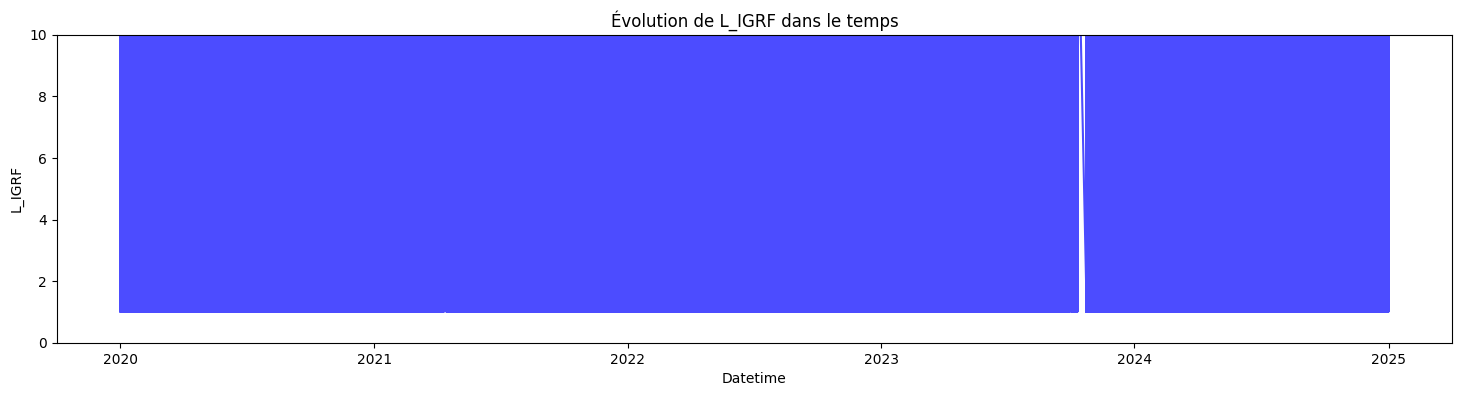

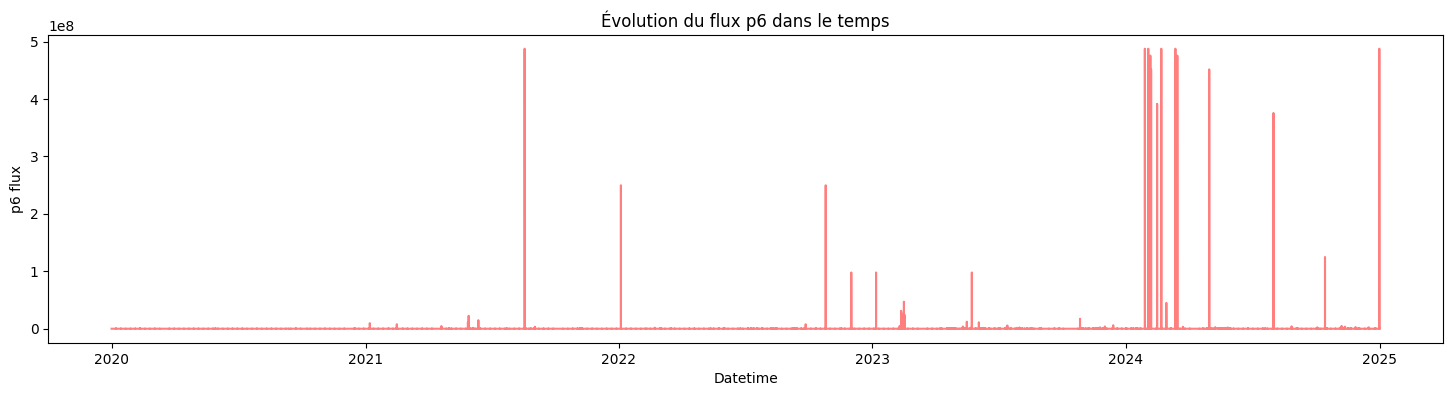

In [ ]:
# Graphe pour L_IGRF
plt.figure(figsize=(18,4))
plt.plot(df['datetime'], df['L_IGRF'], color='blue', alpha=0.7)
plt.xlabel("Datetime")
plt.ylabel("L_IGRF")
plt.title("Évolution de L_IGRF dans le temps")
plt.ylim(0, 10)  # Échelle adaptée à L_IGRF
plt.show()

# Graphe pour p6 flux
plt.figure(figsize=(18,4))
plt.plot(df['datetime'], df['p6'], color='red', alpha=0.5)
plt.xlabel("Datetime")
plt.ylabel("p6 flux")
plt.title("Évolution du flux p6 dans le temps")
plt.show()

In [ ]:
# import plotly.express as px

# # Définir la période de 20 jours
# start_time = df['datetime'].min()
# end_time = start_time + pd.Timedelta(days=20)
# df_20days = df[(df['datetime'] >= start_time) & (df['datetime'] <= end_time)]

# # Tracer le graphe interactif
# fig = px.line(df_20days, x='datetime', y='L_IGRF',
#               title=f"Évolution de L_IGRF sur 20 jours ({start_time.date()} → {end_time.date()})",
#               labels={'L_IGRF': 'L_IGRF', 'datetime': 'Date'})
# fig.update_yaxes(range=[0,10])  # Limiter l'échelle Y pour L
# fig.show()


In [ ]:
# import sys
# !{sys.executable} -m pip install nbformat plotly


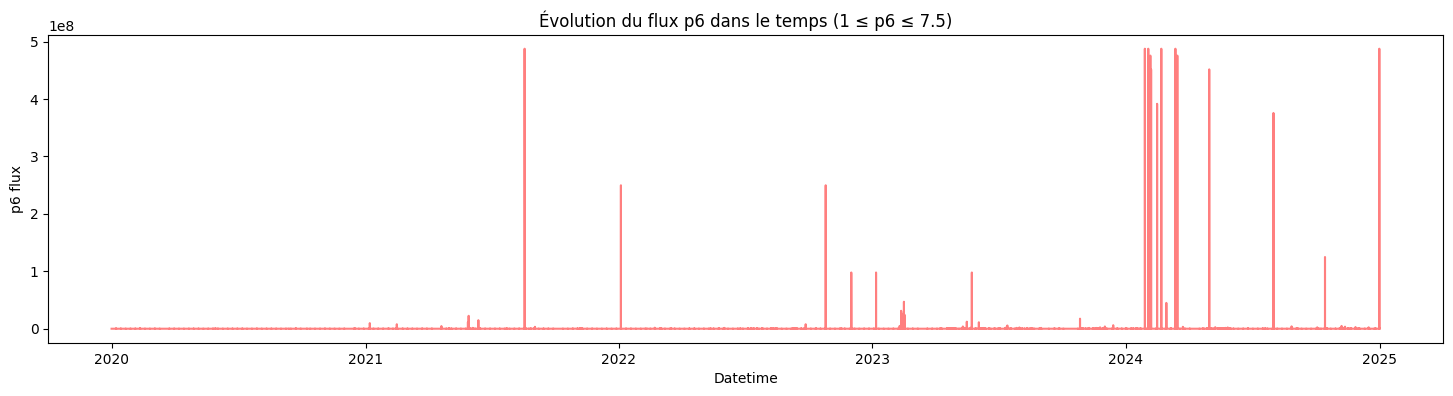

In [ ]:


# Tracer
plt.figure(figsize=(18,4))
plt.plot(df['datetime'], df['p6'], color='red', alpha=0.5)
plt.xlabel("Datetime")
plt.ylabel("p6 flux")
plt.title("Évolution du flux p6 dans le temps (1 ≤ p6 ≤ 7.5)")
plt.show()

In [ ]:
df.describe()

,year,day,msec,L_IGRF,p6,datetime
count,7.634780e+07,7.634780e+07,7.634780e+07,6.436339e+07,7.634780e+07,76347799
mean,2.021977e+03,1.826148e+02,4.320727e+07,3.840669e+00,1.068344e+03,2022-06-23 12:14:10.214629376
min,2.020000e+03,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,2020-01-01 00:01:12.695000
25%,2.021000e+03,9.100000e+01,2.160058e+07,1.200000e+00,0.000000e+00,2021-03-24 12:40:31.028000
50%,2.022000e+03,1.820000e+02,4.323442e+07,2.000000e+00,0.000000e+00,2022-06-18 01:44:53.329999872
75%,2.023000e+03,2.720000e+02,6.478590e+07,4.700000e+00,2.439024e+02,2023-09-07 13:00:03.824000
max,2.024000e+03,3.660000e+02,8.640000e+07,2.000000e+01,4.875239e+08,2024-12-31 22:46:48.040000
std,1.414663e+00,1.053033e+02,2.494447e+07,4.054845e+00,2.557719e+05,NaN


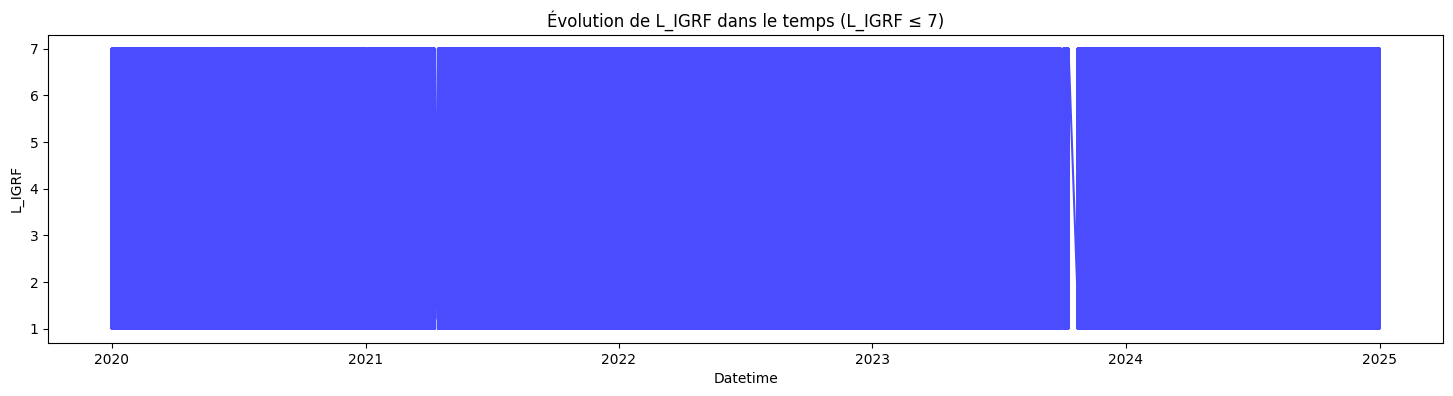

In [ ]:
# Filtrer les outliers : ne garder que L_IGRF ≤ 10
df_filtered_L = df[df['L_IGRF'] <= 7]

# Tracer
plt.figure(figsize=(18,4))
plt.plot(df_filtered_L['datetime'], df_filtered_L['L_IGRF'], color='blue', alpha=0.7)
plt.xlabel("Datetime")
plt.ylabel("L_IGRF")
plt.title("Évolution de L_IGRF dans le temps (L_IGRF ≤ 7)")
plt.show()

On prend une valeur de temps toutes les 12H 
à cette valeur de temps ex 2 janvier à 12h00 on prends le L_IGRF correspondant et on l'arrondi à 0.1 (exemple on a 2.9)
ensuite on prend tous les p6 qui correspondnent à 2.9 et on en fait la moyenne donc on a une valeur de temps, une valeur de L_IGRF et une valeur de p6 

Donc je commence le filtrage selon ces instructions 
 

In [ ]:
# 1. Filtrage de 2.8 à 7
df_filtered = df[(df['L_IGRF'] <= 7) & (df['L_IGRF'] > 2.8)].copy()

# 2. On renomme la colonne
df_filtered["L_IGRF_rounded"] = df_filtered["L_IGRF"].round(1)


       year  day      msec  L_IGRF          p6                datetime  \
116    2020    1    304695     2.9    0.000000 2020-01-01 00:05:04.695   
117    2020    1    306695     2.9    0.000000 2020-01-01 00:05:06.695   
118    2020    1    308695     2.9  243.902435 2020-01-01 00:05:08.695   
119    2020    1    310695     2.9  243.902435 2020-01-01 00:05:10.695   
120    2020    1    312695     2.9  243.902435 2020-01-01 00:05:12.695   
...     ...  ...       ...     ...         ...                     ...   
9911   2020    1  19912696     2.9    0.000000 2020-01-01 05:31:52.696   
9912   2020    1  19914696     2.9  487.804871 2020-01-01 05:31:54.696   
9913   2020    1  19916696     2.9  243.902435 2020-01-01 05:31:56.696   
9914   2020    1  19918696     2.9    0.000000 2020-01-01 05:31:58.696   
10801  2020    1  21796696     2.9    0.000000 2020-01-01 06:03:16.696   

       L_IGRF_rounded datetime_12H  
116               2.9   2020-01-01  
117               2.9   2020-01-01  


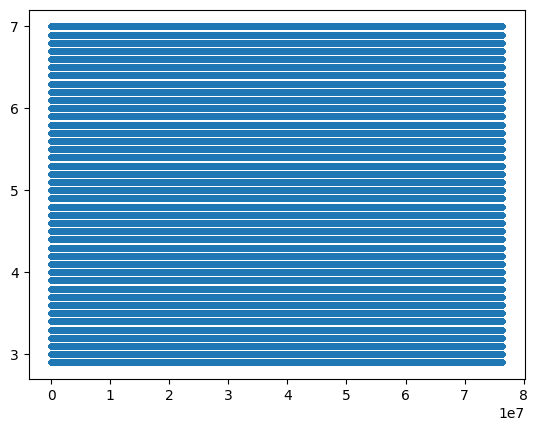

In [ ]:
# On prend une valeur toutes les 12 heures

df_filtered['datetime_12H'] = df['datetime'].dt.floor('12h') 
df_filtered["datetime_12H"] = pd.to_datetime(df_filtered["datetime_12H"])

# 3. Regroupement par l'intervalle de 12H et par la valeur arrondie de L_IGRF, 
# puis calcul de la moyenne de p6.
df_grouped = df_filtered.groupby(["datetime_12H", "L_IGRF_rounded"])["p6"].mean().reset_index()


# 4. Renommer la colonne p6 agrégée et L_IGRF arrondie, puis trier
df_grouped = df_grouped.rename(columns={
    "p6": "p6_filtered",
    "L_IGRF_rounded": "L_IGRF"
})
# Trier par 'datetime_12H' puis par 'L_IGRF' dans l'ordre croissant.
df_filtered = df_filtered.sort_values(by=['datetime_12H', 'L_IGRF'])

# Afficher le résultat
print(df_filtered.head(100))

plt.plot(df_filtered['L_IGRF'], '.')



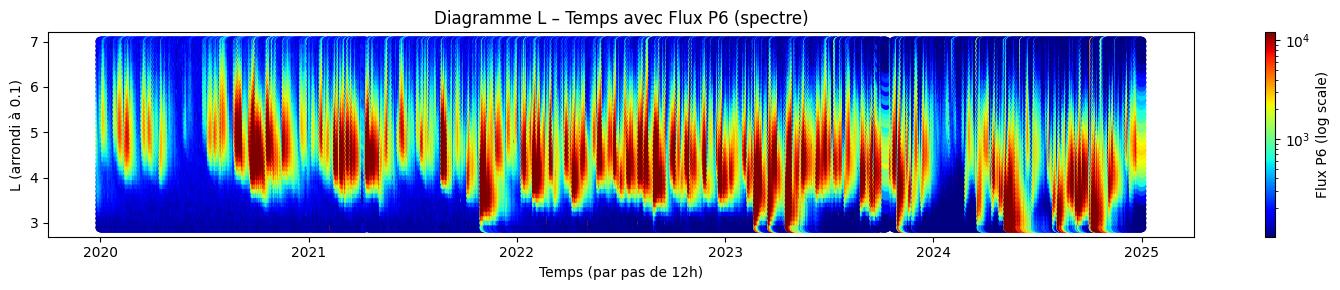

In [ ]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

# 1. Tri correct du dataframe
df_grouped = df_grouped.sort_values(["datetime_12H", "L_IGRF"])

# 2. Calcul des quantiles pour la couleur (après filtrage + groupby)
vmin = df_grouped["p6_filtered"].quantile(0.05)
vmax = df_grouped["p6_filtered"].quantile(0.95)

# 3. Plot scatter
plt.figure(figsize=(15,3))

scatter = plt.scatter(
    df_grouped["datetime_12H"],
    df_grouped["L_IGRF"],
    c=df_grouped["p6_filtered"],
    cmap="jet",
    norm=LogNorm(vmin=vmin, vmax=vmax)
)

plt.colorbar(scatter, label="Flux P6 (log scale)")
plt.xlabel("Temps (par pas de 12h)")
plt.ylabel("L (arrondi à 0.1)")
plt.title("Diagramme L – Temps avec Flux P6 (spectre)")
plt.tight_layout()
plt.show()


il faut un dataframe avec le Bz Vitesse du vent solaire avec omni et -?- 

df-4-train = df(l=4)


pour le training on prend en x_train(Vsw, Bz, F)  #le f c'est solar radio flux
                             y_train(p6)
modele = linéaire
modele.fit(xtrain, ytrain)

y_predict = modele.predict(x_test) et on doit obtenir y_test 

on obtient une courbe avec un R²



Pour entrainer la prédiction prendre la valeur du flux y'a 12h


Seuil 95ème percentile pour p6_filtered : 12023.552
Nombre d'événements détectés (p6_filtered ≥ 95e perc): 7581
             datetime_12H  L_IGRF   p6_filtered
20513 2020-09-02 00:00:00     4.6  13252.032227
20514 2020-09-02 00:00:00     4.7  15507.891602
20515 2020-09-02 00:00:00     4.8  16956.048828
20516 2020-09-02 00:00:00     4.9  17829.558594
20517 2020-09-02 00:00:00     5.0  17872.205078
20518 2020-09-02 00:00:00     5.1  17092.425781
20519 2020-09-02 00:00:00     5.2  15170.997070
20520 2020-09-02 00:00:00     5.3  12172.357422
20562 2020-09-02 12:00:00     5.3  14369.574219
20561 2020-09-02 12:00:00     5.2  16670.201172


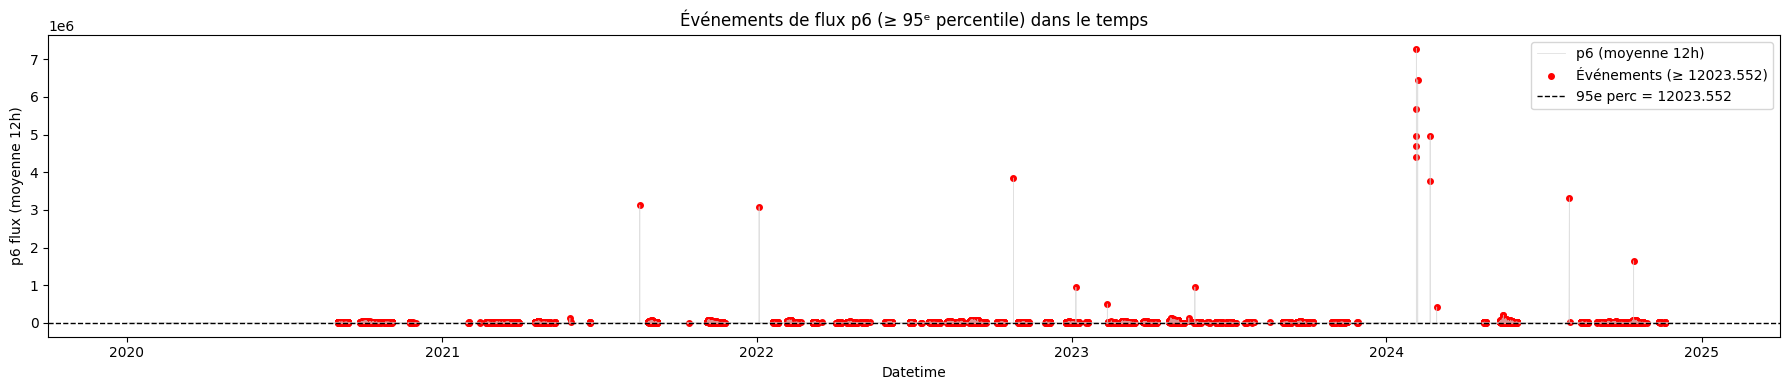

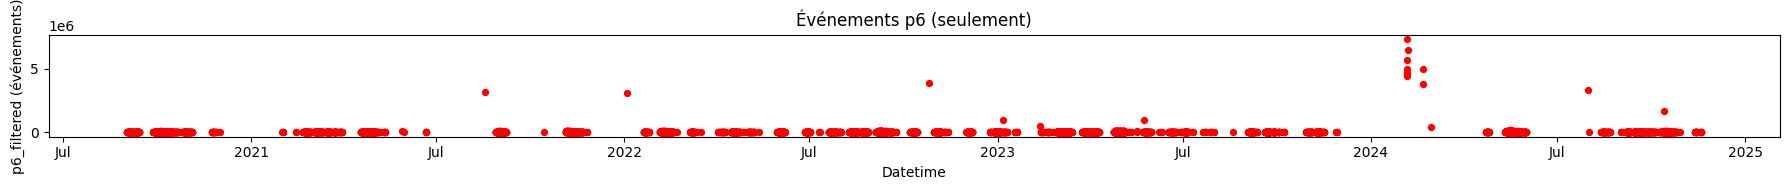

In [ ]:
import matplotlib.dates as mdates

# --- Calcul du seuil (95ème percentile) ---
threshold_95 = df_grouped['p6_filtered'].dropna().quantile(0.95)
print(f"Seuil 95ème percentile pour p6_filtered : {threshold_95:.3f}")

# --- Détection des événements ---
df_events = df_grouped[df_grouped['p6_filtered'] >= threshold_95].copy()
df_events = df_events.sort_values('datetime_12H')
print(f"Nombre d'événements détectés (p6_filtered ≥ 95e perc): {len(df_events)}")

# --- Affichage d'un petit extrait ---
print(df_events[['datetime_12H', 'L_IGRF', 'p6_filtered']].head(10))

# --- Tracé : p6_filtered (fond) + événements (points rouges) + ligne de seuil ---
plt.figure(figsize=(18,4))
# tracé complet du flux p6_filtered (faible alpha pour lisibilité)
plt.plot(df_grouped['datetime_12H'], df_grouped['p6_filtered'], color='lightgray', linewidth=0.6, label='p6 (moyenne 12h)', alpha=0.7)

# événements en points rouges
plt.scatter(df_events['datetime_12H'], df_events['p6_filtered'], color='red', s=16, label=f'Événements (≥ {threshold_95:.3f})')

# ligne horizontale du seuil
plt.axhline(threshold_95, color='k', linestyle='--', linewidth=1, label=f'95e perc = {threshold_95:.3f}')

# mise en forme temporelle de l'axe x
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.xlabel("Datetime")
plt.ylabel("p6 flux (moyenne 12h)")
plt.title("Événements de flux p6 (≥ 95ᵉ percentile) dans le temps")
plt.legend()
plt.tight_layout()
plt.show()

# --- Tracé alternatif : uniquement les événements ---
plt.figure(figsize=(18,2))
plt.scatter(df_events['datetime_12H'], df_events['p6_filtered'], color='red', s=18)
plt.xlabel("Datetime")
plt.ylabel("p6_filtered (événements)")
plt.title("Événements p6 (seulement)")
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))
plt.tight_layout()
plt.show()

On remarque qu'il y a beaucoup trop d'évenements. On tente l'établissement d'un Z-score pour les filtrer. On teste plusieurs valeurs et on prendre finalement 1 sigma. 

In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_grouped['p6_filtered']))
outliers = df_grouped[z_scores > 1]  # seuil Z à 1 sigma
print(f"Nombre d'outliers détectés : {len(outliers)}")


Nombre d'outliers détectés : 516


On trace ces outliers : 

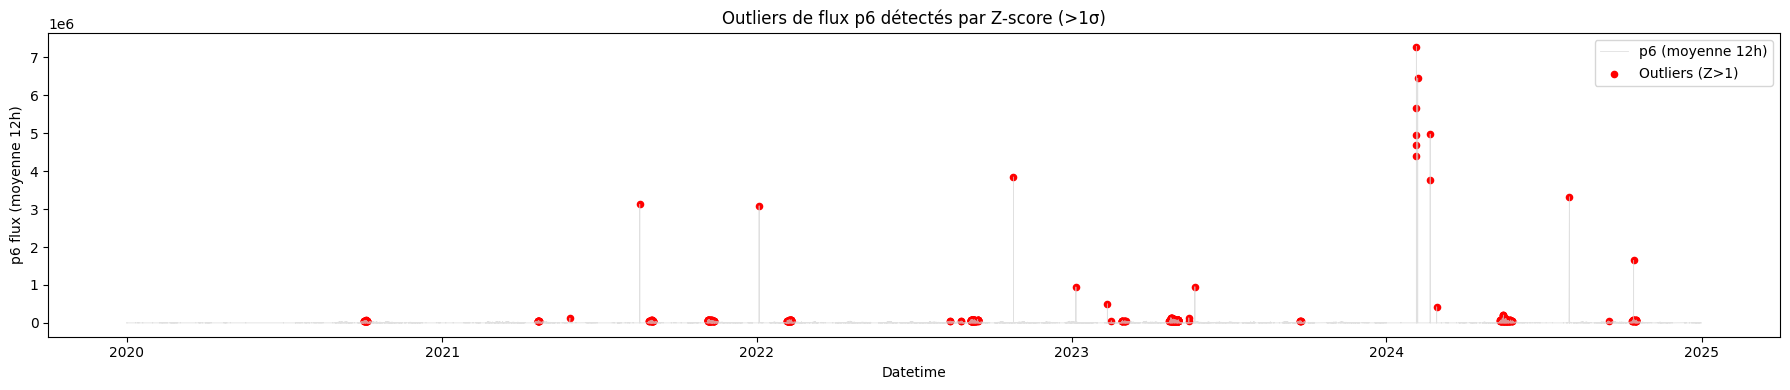

In [ ]:
# --- Tracé complet du flux p6_filtered ---
plt.figure(figsize=(18,4))
plt.plot(df_grouped['datetime_12H'], df_grouped['p6_filtered'], color='lightgray', linewidth=0.6, alpha=0.7, label='p6 (moyenne 12h)')

# --- Tracé des outliers ---
plt.scatter(outliers['datetime_12H'], outliers['p6_filtered'], color='red', s=20, label=f'Outliers (Z>1)')

# --- Mise en forme temporelle de l'axe x ---
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(mdates.AutoDateLocator()))

# --- Labels et titre ---
plt.xlabel("Datetime")
plt.ylabel("p6 flux (moyenne 12h)")
plt.title("Outliers de flux p6 détectés par Z-score (>1σ)")
plt.legend()
plt.tight_layout()
plt.show()

ON CHERCHE MAINTENANT A IMPORTER LES DONNES OMNI : BZ VITESSE_SOLAR_WIND ET F10.7 ON UTILISE SUNPY : 


In [ ]:
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.timeseries import TimeSeries

range = a.Time('2020/01/01', '2024/12/31')
dataset = a.cdaweb.Dataset('OMNI2_H0_MRG1HR')
result = Fido.search(range, dataset)
print(result)


z:\Documents\School\Space Data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Results from 1 Provider:

10 Results from the CDAWEBClient:
Source: https://cdaweb.gsfc.nasa.gov/index.html

    Dataset            Start time               End time       
--------------- ----------------------- -----------------------
OMNI2_H0_MRG1HR 2020-01-01 00:00:00.000 2020-06-30 23:00:00.000
OMNI2_H0_MRG1HR 2020-07-01 00:00:00.000 2020-12-31 23:00:00.000
OMNI2_H0_MRG1HR 2021-01-01 00:00:00.000 2021-06-30 23:00:00.000
OMNI2_H0_MRG1HR 2021-07-01 00:00:00.000 2021-12-31 23:00:00.000
OMNI2_H0_MRG1HR 2022-01-01 00:00:00.000 2022-06-30 23:00:00.000
OMNI2_H0_MRG1HR 2022-07-01 00:00:00.000 2022-12-31 23:00:00.000
OMNI2_H0_MRG1HR 2023-01-01 00:00:00.000 2023-06-30 23:00:00.000
OMNI2_H0_MRG1HR 2023-07-01 00:00:00.000 2023-12-31 23:00:00.000
OMNI2_H0_MRG1HR 2024-01-01 00:00:00.000 2024-06-30 23:00:00.000
OMNI2_H0_MRG1HR 2024-07-01 00:00:00.000 2024-12-31 23:00:00.000




In [ ]:
# Téléchargement des fichiers


dl_files = Fido.fetch(result, path=os.path.join("Donnees_Spatiales/omni", '{file}'))
print("Fichiers téléchargés :")
for f in dl_files:
    print(f)

Files Downloaded: 100%|██████████| 10/10 [00:00<00:00, 26.45file/s]

Fichiers téléchargés :
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20200101_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20200701_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20210101_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20210701_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20220101_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20220701_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20230101_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20230701_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20240101_v01.cdf
Donnees_Spatiales\omni\omni2_h0_mrg1hr_20240701_v01.cdf


In [ ]:

# Création du TimeSeries et conversion en DataFrame


TIME = TimeSeries(dl_files, concatenate=True)
df_omni = TIME.to_dataframe()

2025-12-05 21:26:51 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "Beta". Assigning dimensionless units.
2025-12-05 21:26:51 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "Day". Assigning dimensionless units.
2025-12-05 21:26:51 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "HR". Assigning dimensionless units.
2025-12-05 21:26:51 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "IMF". Assigning dimensionless units.
2025-12-05 21:26:51 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "IMF_PTS". Assigning dimensionless units.
2025-12-05 21:26:51 - sunpy - WARNING: SunpyUserWarning: No units provided for variable "KP". Assigning dimensionless units.
2025-12-05 21:26:51 - sunpy - WARNING: SunpyUserWarning: astropy did not recognize units of "(6=No,1=All,-1=n/a)". Assigning dimensionless units. If you think this unit should not be dimensionless, please raise an issue at https://github.com

In [ ]:
df_omni.head()

,ABS_B,AE,AL_INDEX,AP_INDEX,AU_INDEX,BX_GSE,BY_GSE,BY_GSM,BZ_GSE,BZ_GSM,...,SIGMA-T,SIGMA-THETA-V,SIGMA-V,SIGMA-ratio,Solar_Lyman_alpha,T,THETA-V,THETA_AV,V,YR
Epoch,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2.5,17,-2,2,15,0.3,-0.7,-0.6,-0.2,-0.3,...,6159.0,0.6,2.0,0.002,0.006118,22067.0,-0.0,-13.700000,295.0,2020
2020-01-01 01:00:00,2.9,18,-1,2,17,2.2,0.6,0.4,0.7,0.8,...,4359.0,0.9,4.0,0.004,0.006118,30130.0,-0.5,16.799999,299.0,2020
2020-01-01 02:00:00,4.0,18,-4,2,14,3.3,-1.6,-1.6,0.1,-0.3,...,9182.0,1.2,4.0,0.005,0.006118,39156.0,0.6,0.900000,300.0,2020
2020-01-01 03:00:00,5.3,16,-3,0,13,4.8,-2.1,-2.1,0.4,-0.0,...,6410.0,0.8,4.0,0.002,0.006118,25524.0,2.1,4.400000,298.0,2020
2020-01-01 04:00:00,4.4,15,-2,0,13,3.5,-0.8,-1.1,1.8,1.6,...,6773.0,0.6,6.0,0.003,0.006118,30304.0,2.8,26.299999,302.0,2020


In [ ]:
df_omni.columns.tolist()

['ABS_B',
 'AE',
 'AL_INDEX',
 'AP_INDEX',
 'AU_INDEX',
 'BX_GSE',
 'BY_GSE',
 'BY_GSM',
 'BZ_GSE',
 'BZ_GSM',
 'Beta',
 'DST',
 'Day',
 'E',
 'F',
 'F10_INDEX',
 'HR',
 'IMF',
 'IMF_PTS',
 'KP',
 'MFLX',
 'Mach_num',
 'Mgs_mach_num',
 'N',
 'PC_N_INDEX',
 'PHI-V',
 'PHI_AV',
 'PLS',
 'PLS_PTS',
 'PR-FLX_1',
 'PR-FLX_10',
 'PR-FLX_2',
 'PR-FLX_30',
 'PR-FLX_4',
 'PR-FLX_60',
 'Pressure',
 'Proton_QI',
 'R',
 'Ratio',
 'Rot#',
 'SIGMA-ABS_B',
 'SIGMA-B',
 'SIGMA-Bx',
 'SIGMA-By',
 'SIGMA-Bz',
 'SIGMA-N',
 'SIGMA-PHI-V',
 'SIGMA-T',
 'SIGMA-THETA-V',
 'SIGMA-V',
 'SIGMA-ratio',
 'Solar_Lyman_alpha',
 'T',
 'THETA-V',
 'THETA_AV',
 'V',
 'YR']

In [ ]:
# On extrait les données nécessaires

df_omni = df_omni[["BZ_GSM", "V", "F10_INDEX"]]
df_omni.head()

,BZ_GSM,V,F10_INDEX
Epoch,,,
2020-01-01 00:00:00,-0.3,295.0,69.400002
2020-01-01 01:00:00,0.8,299.0,69.400002
2020-01-01 02:00:00,-0.3,300.0,69.400002
2020-01-01 03:00:00,-0.0,298.0,69.400002
2020-01-01 04:00:00,1.6,302.0,69.400002


Vérification des NaN : 


In [ ]:
df_omni.isna().any().any()

np.True_

On a des Nan, on cherche à les supprimer

In [ ]:
df_omni_clean = df_omni.dropna()
print(f"Ancien nombre de lignes : {len(df_omni)}, nouveau : {len(df_omni_clean)}")

Ancien nombre de lignes : 43848, nouveau : 43103


On cherche des outliers dans le dataframe : 



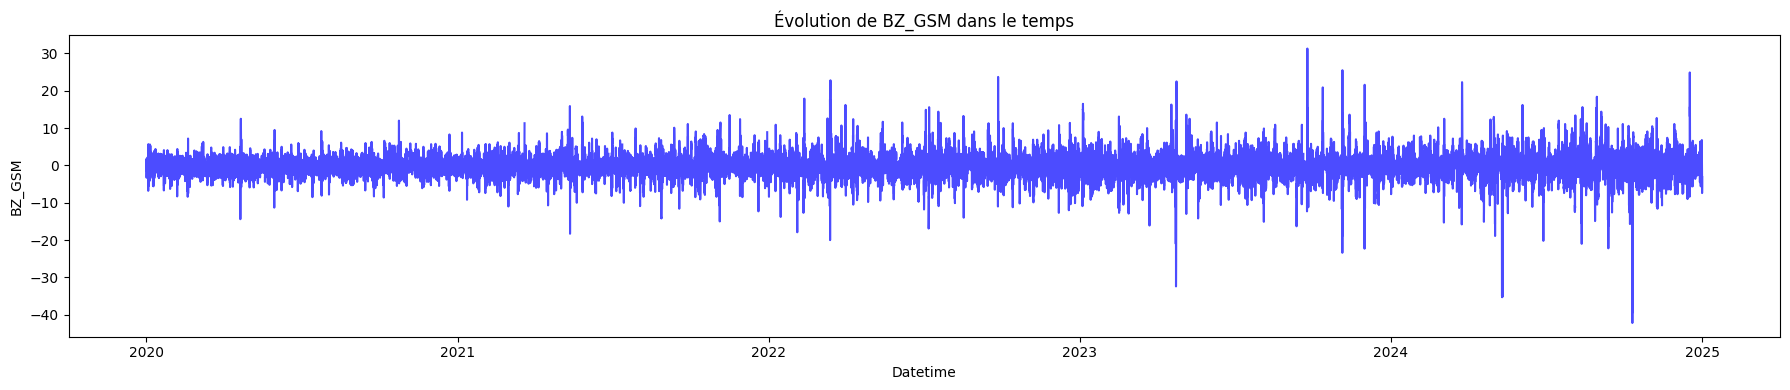

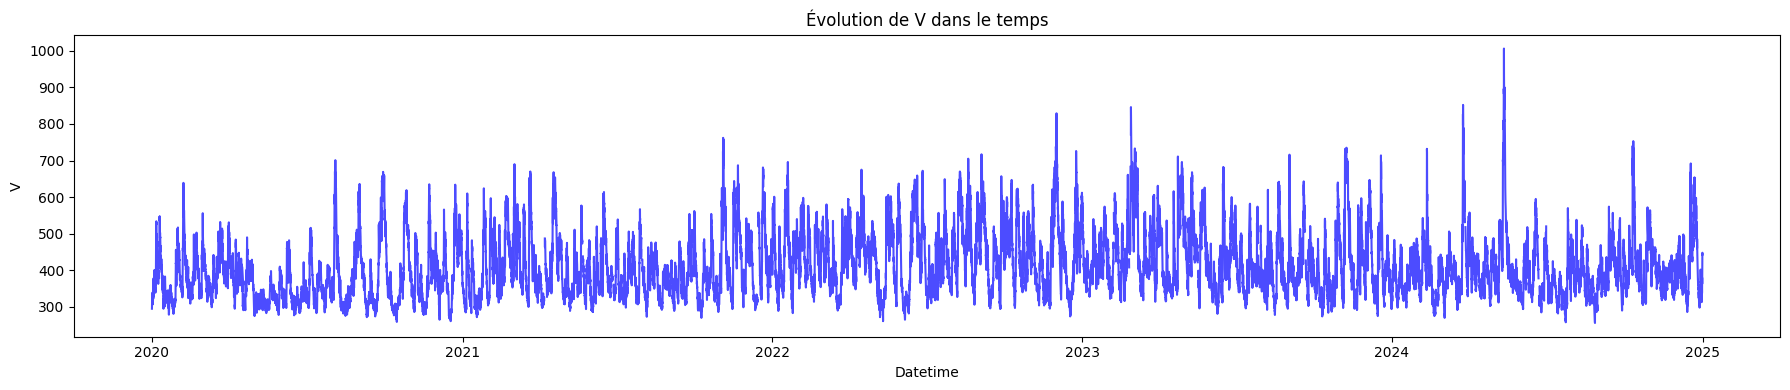

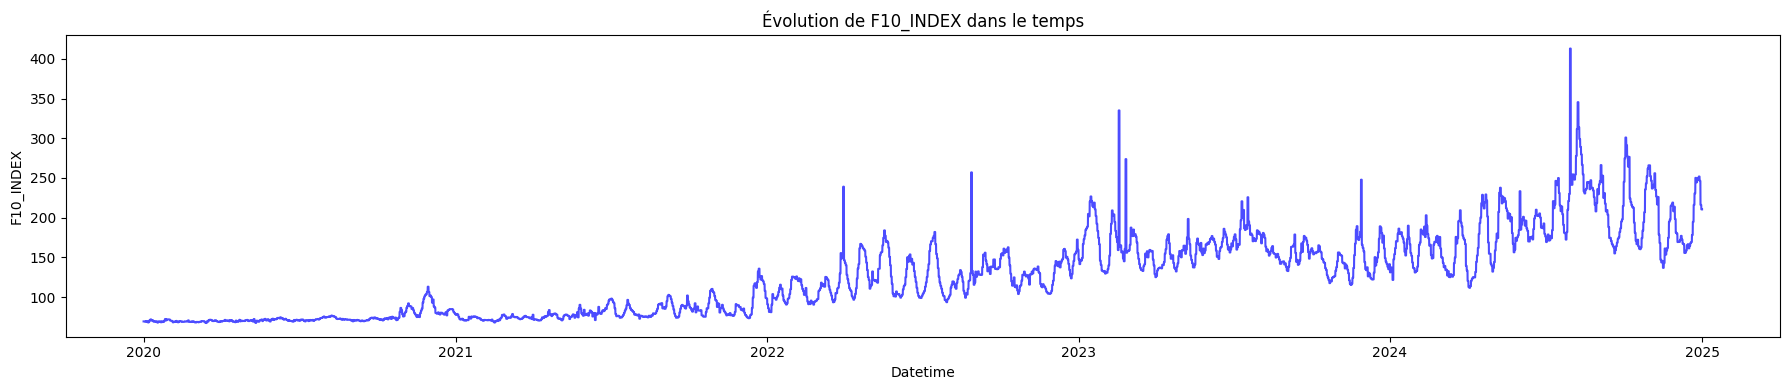

In [ ]:

# Colonnes à tracer
cols = df_omni.columns.tolist()  # ['BZ_GSM', 'V', 'F10_INDEX']

# Tracé
for col in cols:
    plt.figure(figsize=(18,4))
    plt.plot(df_omni.index, df_omni[col], color='blue', alpha=0.7)
    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.title(f"Évolution de {col} dans le temps")
    plt.tight_layout()
    plt.show()

In [ ]:
print(df_omni.columns)
print(df_omni.index)


Index(['BZ_GSM', 'V', 'F10_INDEX'], dtype='object')
DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2024-12-31 14:00:00', '2024-12-31 15:00:00',
               '2024-12-31 16:00:00', '2024-12-31 17:00:00',
               '2024-12-31 18:00:00', '2024-12-31 19:00:00',
               '2024-12-31 20:00:00', '2024-12-31 21:00:00',
               '2024-12-31 22:00:00', '2024-12-31 23:00:00'],
              dtype='datetime64[ns]', name='Epoch', length=43848, freq=None)


In [ ]:
from scipy import stats

sig = 1.5

z_scores_V = np.abs(stats.zscore(df_omni_clean['V']))
omni_outliers = df_omni_clean[z_scores_V > sig]  
print(f"Nombre d'outliers détectés pour V: {len(omni_outliers)}")

z_scores_Bz = np.abs(stats.zscore(df_omni_clean['BZ_GSM']))
omni_outliers = df_omni_clean[z_scores_Bz > sig]  
print(f"Nombre d'outliers détectés pour Bz: {len(omni_outliers)}")

z_scores_f10 = np.abs(stats.zscore(df_omni_clean['F10_INDEX']))
omni_outliers = df_omni_clean[z_scores_f10 > sig]  
print(f"Nombre d'outliers détectés pour F10.7: {len(omni_outliers)}")

df_omni_filtered = df_omni_clean.copy()

df_omni_filtered = df_omni_filtered[
    (np.abs(stats.zscore(df_omni_filtered['V'], nan_policy='omit')) <= sig) &
    (np.abs(stats.zscore(df_omni_filtered['BZ_GSM'], nan_policy='omit')) <= sig) &
    (np.abs(stats.zscore(df_omni_filtered['F10_INDEX'], nan_policy='omit')) <= sig)
]

Nombre d'outliers détectés pour V: 4042
Nombre d'outliers détectés pour Bz: 4138
Nombre d'outliers détectés pour F10.7: 3476


In [ ]:
df_omni_filtered.head(10)

,BZ_GSM,V,F10_INDEX
Epoch,,,
2020-01-01 00:00:00,-0.3,295.0,69.400002
2020-01-01 01:00:00,0.8,299.0,69.400002
2020-01-01 02:00:00,-0.3,300.0,69.400002
2020-01-01 03:00:00,-0.0,298.0,69.400002
2020-01-01 04:00:00,1.6,302.0,69.400002
2020-01-01 05:00:00,0.3,311.0,69.400002
2020-01-01 06:00:00,-1.9,313.0,69.400002
2020-01-01 07:00:00,-3.3,326.0,69.400002
2020-01-01 08:00:00,-3.0,330.0,69.400002


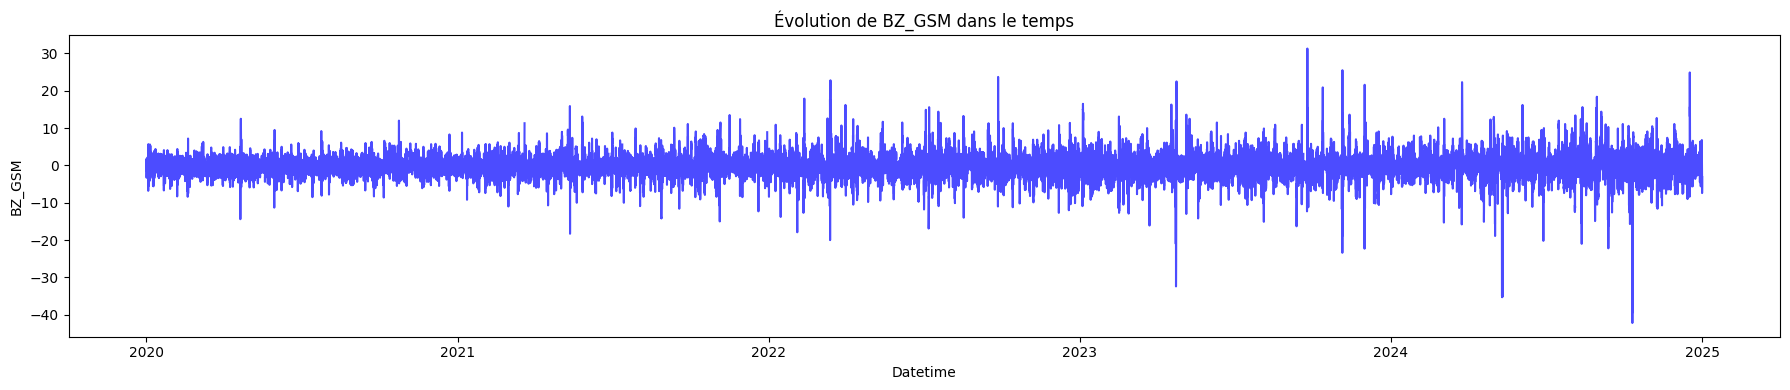

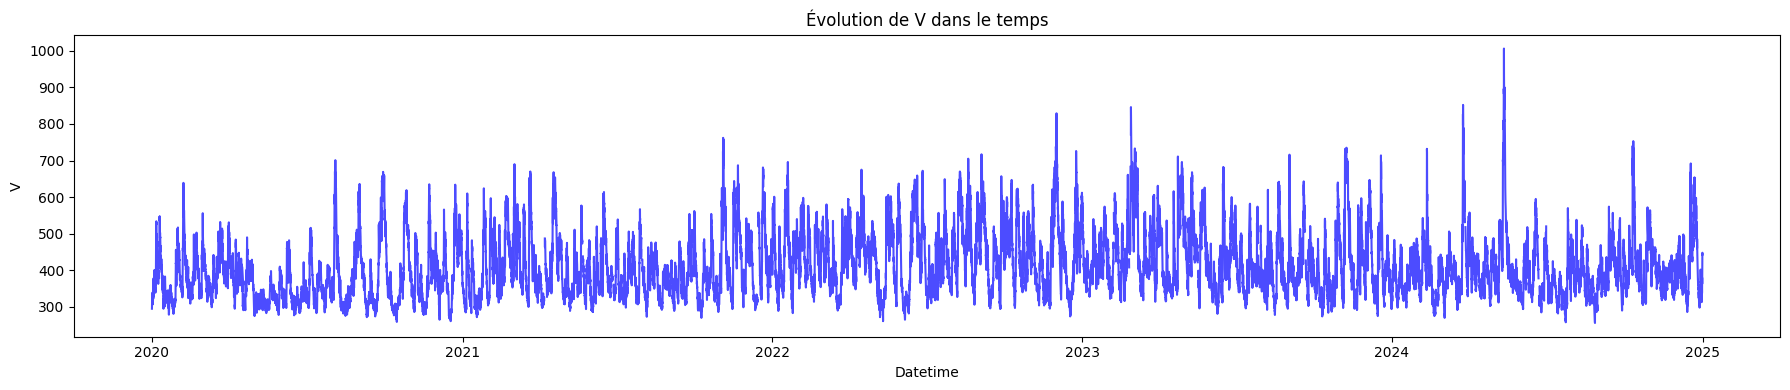

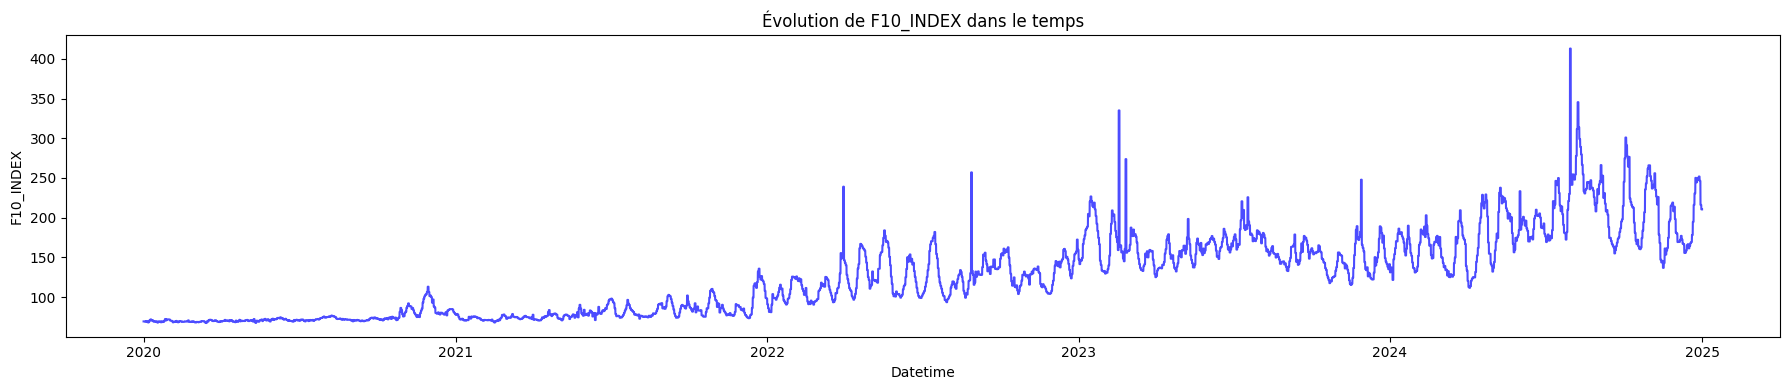

In [ ]:

# Colonnes à tracer
cols = df_omni_filtered.columns.tolist()  # ['BZ_GSM', 'V', 'F10_INDEX']

# Tracé
for col in cols:
    plt.figure(figsize=(18,4))
    plt.plot(df_omni.index, df_omni[col], color='blue', alpha=0.7)
    plt.xlabel("Datetime")
    plt.ylabel(col)
    plt.title(f"Évolution de {col} dans le temps")
    plt.tight_layout()
    plt.show()

=== 95e percentiles ===
V : 510.000
BZ_GSM : 3.200
F10_INDEX : 180.700


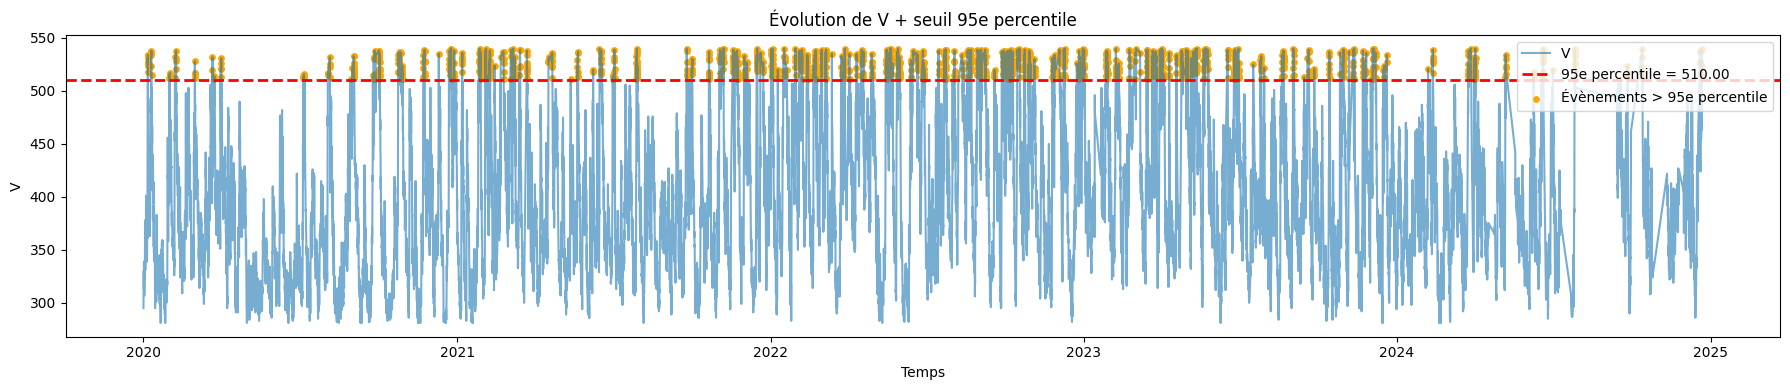

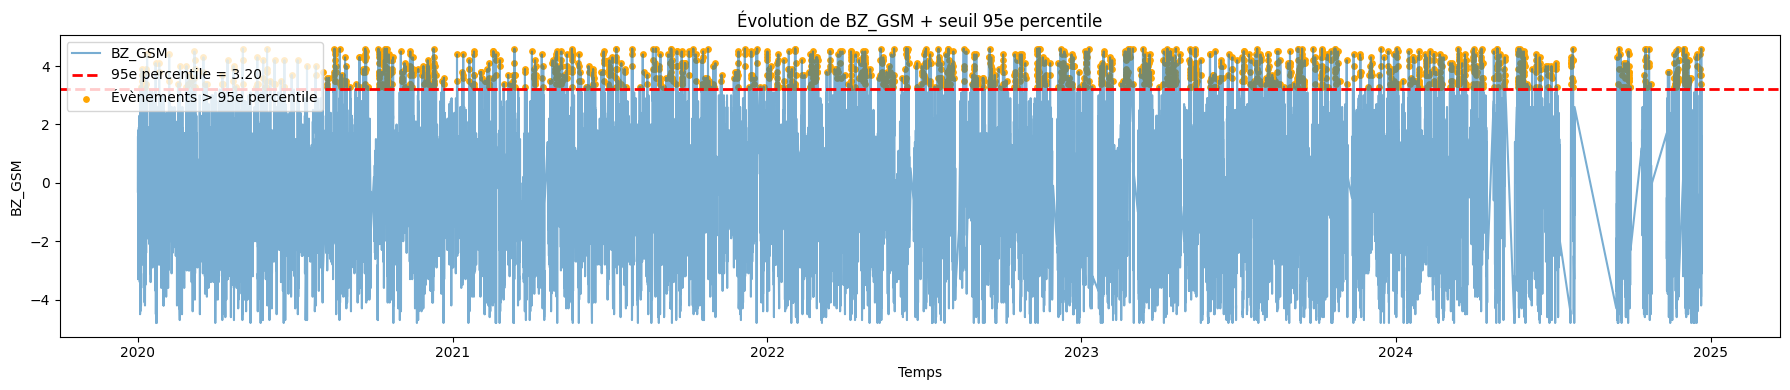

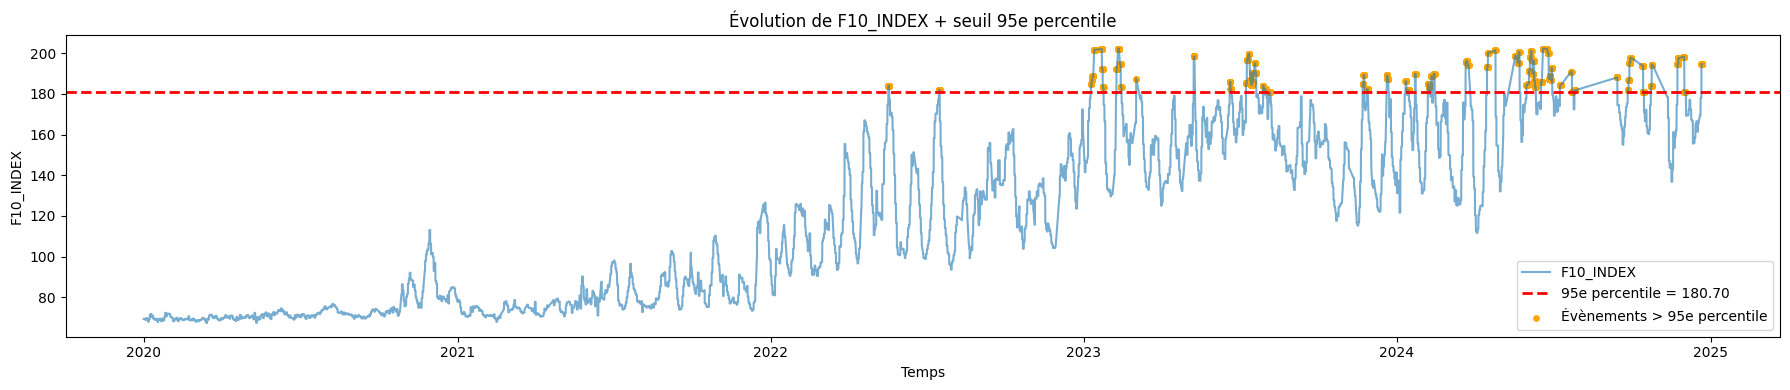

In [ ]:
# Colonnes à analyser
cols = ["V", "BZ_GSM", "F10_INDEX"]

# Calcul des percentiles
percentiles = {col: df_omni_filtered[col].quantile(0.95) for col in cols}

# Affichage des stats
print("=== 95e percentiles ===")
for col, p95 in percentiles.items():
    print(f"{col} : {p95:.3f}")

# Tracer
for col in cols:
    p95 = percentiles[col]

    plt.figure(figsize=(18,4))
    plt.plot(df_omni_filtered.index, df_omni_filtered[col], label=col, alpha=0.6)
    
    # Ligne horizontale = seuil du 95e percentile
    plt.axhline(p95, color='red', linestyle='--', linewidth=2,
                label=f"95e percentile = {p95:.2f}")
    
    # Points > seuil (évènements)
    mask = df_omni_filtered[col] > p95
    plt.scatter(df_omni_filtered.index[mask],
                df_omni_filtered[col][mask],
                color='orange', s=15, label='Évènements > 95e percentile')
    
    plt.title(f"Évolution de {col} + seuil 95e percentile")
    plt.xlabel("Temps")
    plt.ylabel(col)
    plt.legend()
    plt.tight_layout()
    plt.show()

On assemble les données Omni et NOAA, on moyenne les données omni sur 12h : 

In [ ]:
df_omni_filtered['time_12h'] = df_omni_filtered.index.floor("12h")

On compte combien de lignes NOAA avec des L différents existent pour chaque tranche de 12h

In [ ]:
counts_per_timestamp = (
    df_grouped
    .groupby('datetime_12H')
    .size()
    .reset_index(name='count'))

counts_per_timestamp.head(10)

,datetime_12H,count
0,2020-01-01 00:00:00,42
1,2020-01-01 12:00:00,42
2,2020-01-02 00:00:00,42
3,2020-01-02 12:00:00,42
4,2020-01-03 00:00:00,42
5,2020-01-03 12:00:00,42
6,2020-01-04 00:00:00,42
7,2020-01-04 12:00:00,42
8,2020-01-05 00:00:00,42
9,2020-01-05 12:00:00,42


On merge ces "counts" dans omni : 

In [ ]:
df_omni_with_counts = pd.merge(
    df_omni_filtered,
    counts_per_timestamp,
    left_on='time_12h',
    right_on='datetime_12H',
    how='left'
)


On duplique les lignes OMNI en fonction du nombre de points L de NOAA

In [ ]:
# --- 1) Duplique OMNI par timestamp ----
df_omni_repeated = (
    df_omni_filtered
    .reindex(df_grouped['datetime_12H'].values, method='pad')
    .reset_index(drop=True)
)

# --- 2) Ajoute L directement depuis NOAA ---
df_omni_repeated['L_IGRF'] = df_grouped['L_IGRF'].values

# --- 3) Fusion parfaite des deux tableaux ---
df_merged = pd.concat(
    [df_grouped.reset_index(drop=True),
     df_omni_repeated.reset_index(drop=True)],
    axis=1
)

print(len(df_merged), "lignes fusionnées")


151620 lignes fusionnées


On trie les deux dataframe dans le meme ordre avant concaténation, NOAA par ordre de L_IGRF et OMNI par odre de temps


In [ ]:
df_merged.head()

,datetime_12H,L_IGRF,p6_filtered,BZ_GSM,V,F10_INDEX,time_12h,L_IGRF
0,2020-01-01,2.9,112.139053,-0.3,295.0,69.400002,2020-01-01,2.9
1,2020-01-01,3.0,120.148987,-0.3,295.0,69.400002,2020-01-01,3.0
2,2020-01-01,3.1,99.134537,-0.3,295.0,69.400002,2020-01-01,3.1
3,2020-01-01,3.2,138.795303,-0.3,295.0,69.400002,2020-01-01,3.2
4,2020-01-01,3.3,170.909744,-0.3,295.0,69.400002,2020-01-01,3.3


In [ ]:
# On supprime le doublon de L_IGRF
df_merged = df_merged.loc[:, ~df_merged.columns.duplicated()]

df_merged = df_merged.sort_values(['datetime_12H', 'L_IGRF']).reset_index(drop=True)


In [ ]:
df_merged.head()

,datetime_12H,L_IGRF,p6_filtered,BZ_GSM,V,F10_INDEX,time_12h
0,2020-01-01,2.9,112.139053,-0.3,295.0,69.400002,2020-01-01
1,2020-01-01,3.0,120.148987,-0.3,295.0,69.400002,2020-01-01
2,2020-01-01,3.1,99.134537,-0.3,295.0,69.400002,2020-01-01
3,2020-01-01,3.2,138.795303,-0.3,295.0,69.400002,2020-01-01
4,2020-01-01,3.3,170.909744,-0.3,295.0,69.400002,2020-01-01


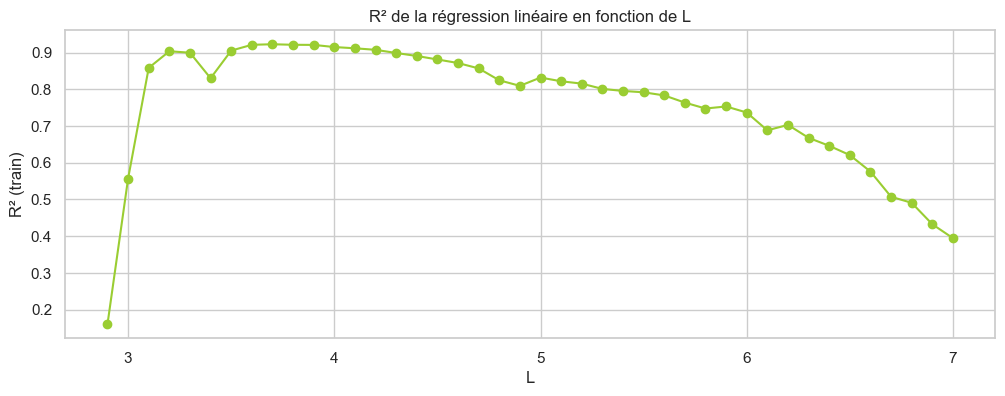

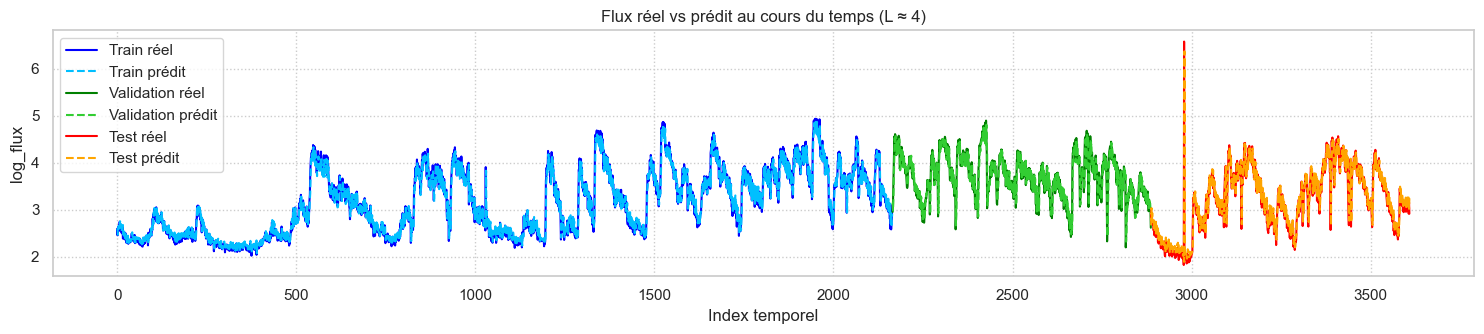

C:\Users\Zombo\AppData\Local\Temp\ipykernel_30612\777742074.py:188: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_line, y_line, "r--", label="Régression", color="purple")


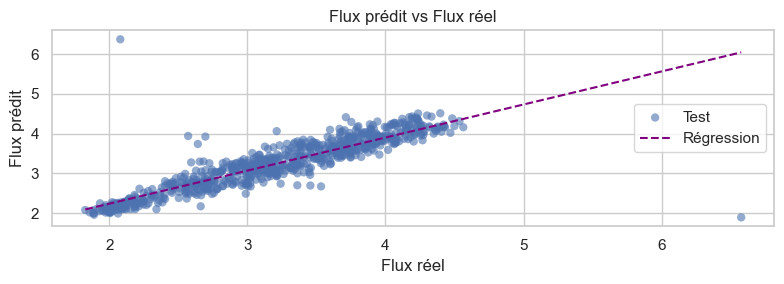

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import builtins
import seaborn as sns

sns.set(style="whitegrid")

# ============================
# 1) Construction de df_model à partir de df_merged
# ============================
df_model = df_merged.copy()

# Harmoniser les noms avec le notebook de Gab
df_model = df_model.rename(columns={
    "p6_filtered": "flux",   # cible
    "L_IGRF": "L"            # coordonnée L
})

# On enlève les flux <= 0 (sinon log10 → -inf)
df_model = df_model[df_model["flux"] > 0].copy()

# Colonne temporelle "time_12h"
if "time_12h" in df_model.columns:
    df_model["time_12h"] = pd.to_datetime(df_model["time_12h"])
else:
    df_model["time_12h"] = pd.to_datetime(df_model["datetime_12H"])

# Log10 du flux
df_model["log_flux"] = np.log10(df_model["flux"])

# Évènements flux > 95e percentile (comme Gab)
threshold_95_model = df_model["flux"].quantile(0.95)
df_model["event"] = (df_model["flux"] >= threshold_95_model).astype(int)

# Nettoyage des inf / NaN
df_model = df_model.replace([np.inf, -np.inf], np.nan)
df_model = df_model.dropna(subset=["log_flux"])

# Tri temporel + L
df_model = df_model.sort_values(["time_12h", "L"]).reset_index(drop=True)

# ============================
# 2) Régression linéaire pour chaque L
# ============================
R_carre = []
L_list = []

# Pour L ≈ 4 (graph temps + scatter)
y_train_L4 = y_train_pred_L4 = None
y_val_L4   = y_val_pred_L4   = None
y_test_L4  = y_test_pred_L4  = None
idx_train_L4 = idx_val_L4 = idx_test_L4 = None

for i in builtins.range(28, 71):   # L de 2.8 à 7.0
    L_centre = i / 10.0

    # Fenêtre de L autour de L_centre
    df_L = df_model[(df_model["L"] > L_centre - 0.05) &
                    (df_model["L"] < L_centre + 0.05)].copy()
    if len(df_L) < 20:
        continue

    # Colonne décalée de 12h
    df_L["log_flux_12h_ago"] = df_L["log_flux"].shift(1)

    # Nettoyage
    df_L = df_L.replace([np.inf, -np.inf], np.nan)
    df_L = df_L.dropna(subset=["log_flux", "log_flux_12h_ago"])
    if len(df_L) < 20:
        continue

    # Colonnes à exclure des features
    colonnes_a_exclure = ["flux", "time_12h", "L", "log_flux",
                          "event", "datetime_12H"]
    colonnes_a_exclure = [c for c in colonnes_a_exclure if c in df_L.columns]

    X = df_L.drop(columns=colonnes_a_exclure)
    X = X.select_dtypes(include=[np.number])
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.dropna(axis=0, how="any")

    y = df_L.loc[X.index, "log_flux"]

    n = len(X)
    if n < 20:
        continue

    train_end = int(0.6 * n)
    val_end   = int(0.8 * n)

    X_train = X.iloc[:train_end]
    y_train = y.iloc[:train_end]

    X_val   = X.iloc[train_end:val_end]
    y_val   = y.iloc[train_end:val_end]

    X_test  = X.iloc[val_end:]
    y_test  = y.iloc[val_end:]

    if len(X_train) == 0 or len(X_val) == 0 or len(X_test) == 0:
        continue

    # Modèle linéaire
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)
    y_test_pred  = model.predict(X_test)

    # On garde tout pour L ≈ 4
    if abs(L_centre - 4.0) < 1e-6:
        # index temporel global : train, puis val, puis test
        idx_train_L4 = np.arange(len(y_train))
        idx_val_L4   = np.arange(len(y_train),
                                 len(y_train) + len(y_val))
        idx_test_L4  = np.arange(len(y_train) + len(y_val),
                                 len(y_train) + len(y_val) + len(y_test))

        y_train_L4      = y_train.to_numpy()
        y_train_pred_L4 = y_train_pred
        y_val_L4        = y_val.to_numpy()
        y_val_pred_L4   = y_val_pred
        y_test_L4       = y_test.to_numpy()
        y_test_pred_L4  = y_test_pred

    # R² sur le train
    R_carre.append(r2_score(y_train, y_train_pred))
    L_list.append(L_centre)

# ============================
# 3) Graphiques
# ============================

# --- R²(L) ---
plt.figure(figsize=(12, 4))
plt.plot(L_list, R_carre, marker="o", color='yellowgreen')
plt.xlabel("L")
plt.ylabel("R² (train)")
plt.title("R² de la régression linéaire en fonction de L")
plt.grid(True)
plt.show()

# --- Flux réel vs prédit au cours du temps, L ≈ 4 ---
if y_train_L4 is not None:
    plt.figure(figsize=(15, 3.5))

    # train
    plt.plot(idx_train_L4, y_train_L4,
             label="Train réel", color="blue")
    plt.plot(idx_train_L4, y_train_pred_L4,
             label="Train prédit", color="deepskyblue", linestyle="--")

    # validation
    plt.plot(idx_val_L4, y_val_L4,
             label="Validation réel", color="green")
    plt.plot(idx_val_L4, y_val_pred_L4,
             label="Validation prédit", color="limegreen", linestyle="--")

    # test
    plt.plot(idx_test_L4, y_test_L4,
             label="Test réel", color="red")
    plt.plot(idx_test_L4, y_test_pred_L4,
             label="Test prédit", color="orange", linestyle="--")

    plt.xlabel("Index temporel")
    plt.ylabel("log_flux")
    plt.title("Flux réel vs prédit au cours du temps (L ≈ 4)")
    plt.legend()
    plt.grid(True, linestyle=":")
    plt.tight_layout()
    plt.show()

    # --- Scatter Flux réel vs Flux prédit (set de test), + droite rouge ---
    plt.figure(figsize=(8, 3))

    # nuage de points
    plt.scatter(y_test_L4, y_test_pred_L4,
                alpha=0.6, edgecolors="none", label="Test")

    # droite de régression y = a x + b (sur le set de test)
    a, b = np.polyfit(y_test_L4, y_test_pred_L4, 1)
    x_line = np.linspace(y_test_L4.min(), y_test_L4.max(), 100)
    y_line = a * x_line + b
    plt.plot(x_line, y_line, "r--", label="Régression", color="purple")

    plt.xlabel("Flux réel")
    plt.ylabel("Flux prédit")
    plt.title("Flux prédit vs Flux réel")
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Pas assez de données propres autour de L = 4.0 pour tracer l’exemple.")


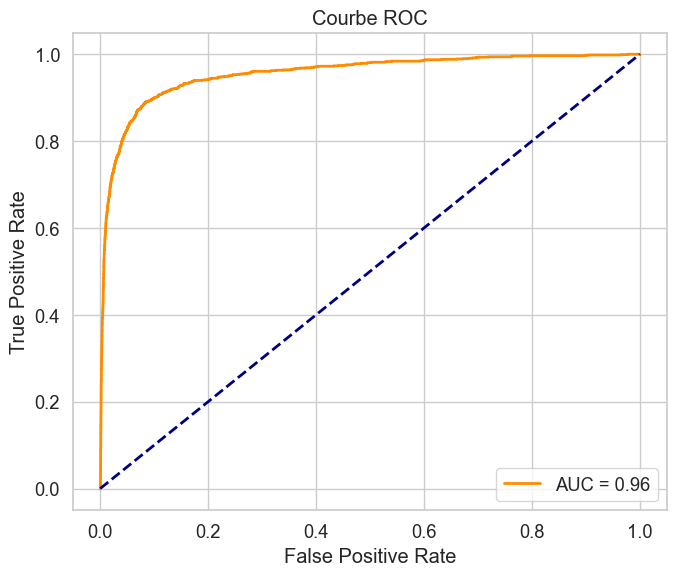

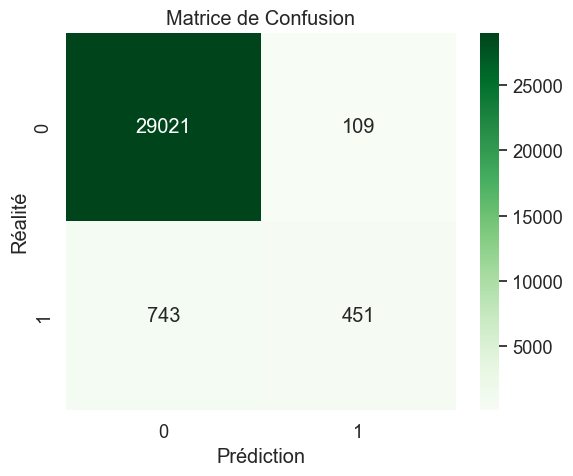

In [ ]:
# ============================
# Classification : Courbe ROC + Matrice de Confusion
# ============================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

sns.set(style="whitegrid", font_scale=1.2)

# Préparation des données
df_class = df_model.copy()
df_class = df_class.replace([np.inf, -np.inf], np.nan)
df_class = df_class.dropna(subset=["log_flux", "event"])
df_class = df_class.sort_values("time_12h")
df_class["log_flux_12h_ago"] = df_class["log_flux"].shift(1)
df_class = df_class.dropna(subset=["log_flux_12h_ago"])

colonnes_a_exclure = ["flux", "log_flux", "event", "time_12h", "L", "datetime_12H"]
colonnes_a_exclure = [c for c in colonnes_a_exclure if c in df_class.columns]

X = df_class.drop(columns=colonnes_a_exclure).select_dtypes(include=[np.number])
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
y = df_class.loc[X.index, "event"]

# Split temporel train / test
n = len(X)
train_end = int(0.6 * n)
val_end   = int(0.8 * n)
X_train, y_train = X.iloc[:train_end], y.iloc[:train_end]
X_test, y_test   = X.iloc[val_end:], y.iloc[val_end:]

# Modèle Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_proba_test = clf.predict_proba(X_test)[:, 1]
y_pred_test  = (y_proba_test >= 0.5).astype(int)

# --- Courbe ROC ---
fpr, tpr, _ = roc_curve(y_test, y_proba_test)
auc = roc_auc_score(y_test, y_proba_test)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color='darkorange', lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# --- Matrice de Confusion ---
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de Confusion")
plt.tight_layout()
plt.show()

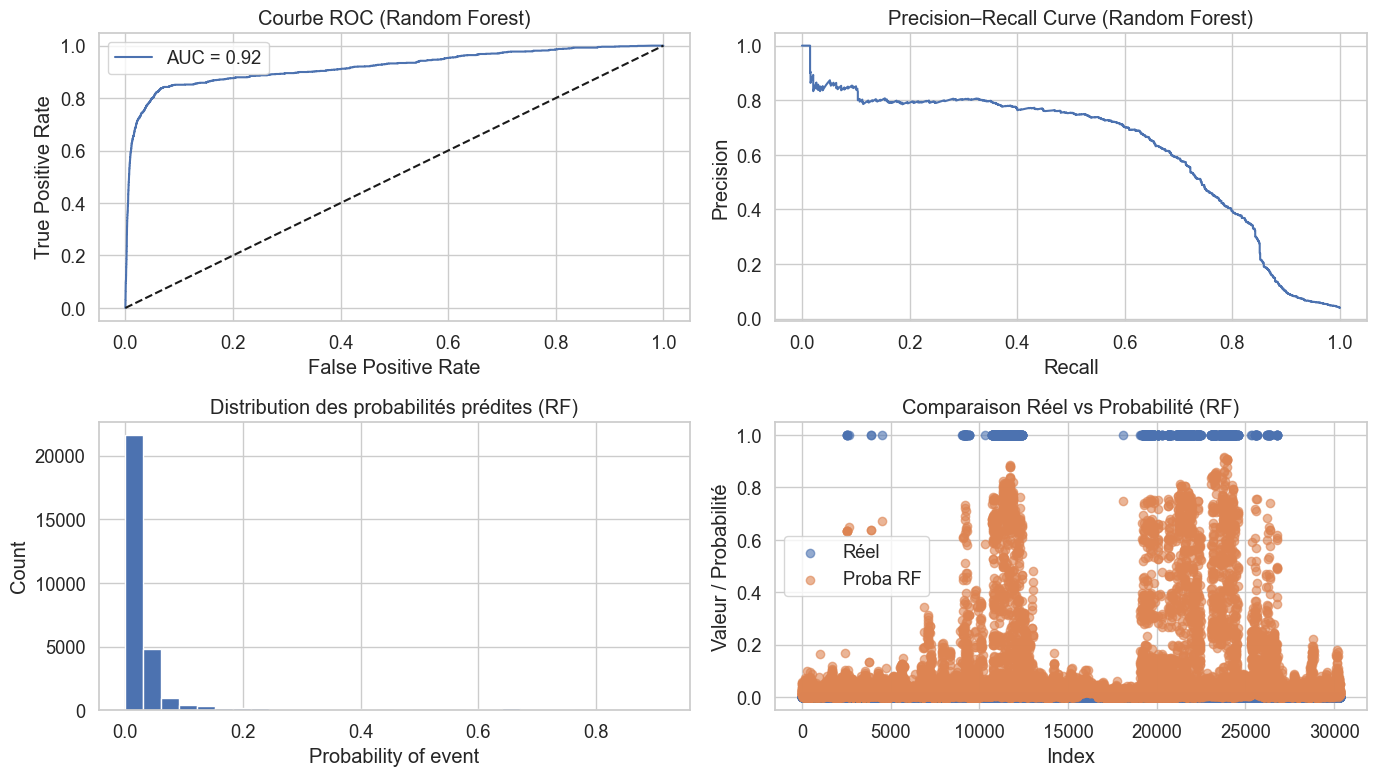

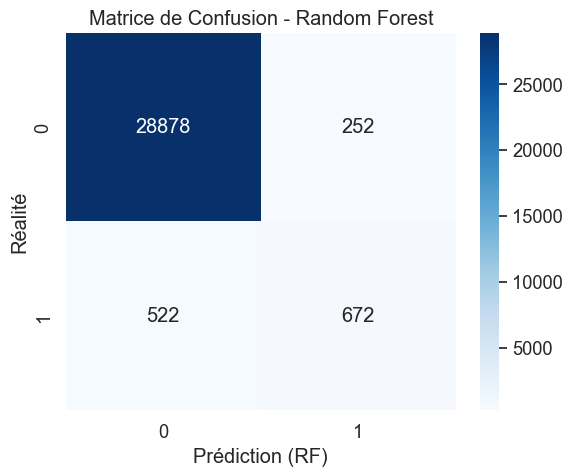

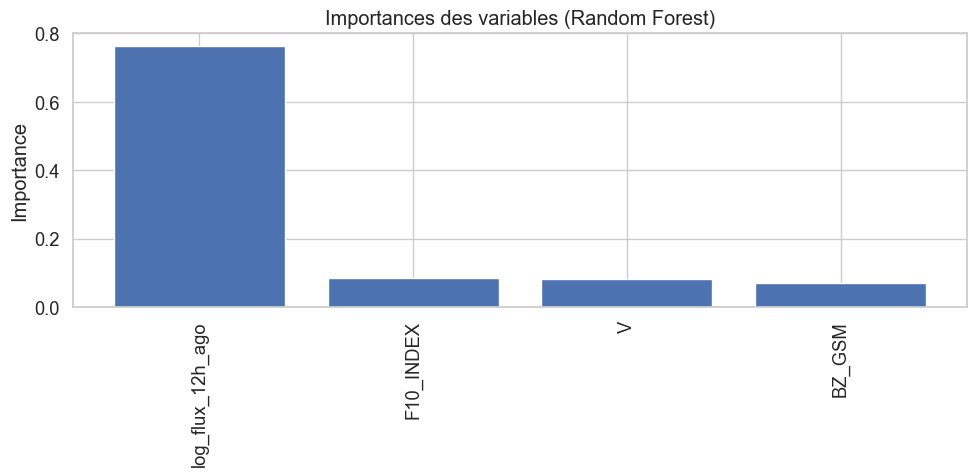

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import builtins   # <-- pour corriger range cassé

sns.set(style="whitegrid", font_scale=1.2)

# ============================
# 1) Random Forest
# ============================
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=5,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

# Probabilités
y_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf  = (y_proba_rf >= 0.5).astype(int)

# ============================
# 2) Courbes ROC & PR
# ============================
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# --- ROC ---
ax = axes[0, 0]
ax.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.2f}")
ax.plot([0, 1], [0, 1], 'k--')
ax.set_title("Courbe ROC (Random Forest)")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.legend()

# --- PR ---
ax = axes[0, 1]
ax.plot(recall_rf, precision_rf)
ax.set_title("Precision–Recall Curve (Random Forest)")
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

# --- Distribution ---
ax = axes[1, 0]
ax.hist(y_proba_rf, bins=30)
ax.set_title("Distribution des probabilités prédites (RF)")
ax.set_xlabel("Probability of event")
ax.set_ylabel("Count")

# --- Réel vs Proba ---
ax = axes[1, 1]
indices = np.arange(len(y_test))
ax.scatter(indices, y_test, label="Réel", alpha=0.6)
ax.scatter(indices, y_proba_rf, label="Proba RF", alpha=0.6)
ax.set_title("Comparaison Réel vs Probabilité (RF)")
ax.set_xlabel("Index")
ax.set_ylabel("Valeur / Probabilité")
ax.legend()

plt.tight_layout()
plt.show()

# ============================
# 3) Matrice de confusion
# ============================
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédiction (RF)")
plt.ylabel("Réalité")
plt.title("Matrice de Confusion - Random Forest")
plt.tight_layout()
plt.show()

# ============================
# 4) Importances des Features (Corrigé!)
# ============================
importances = rf.feature_importances_
feat_names = X_train.columns

idx_sorted = np.argsort(importances)[::-1]
feat_sorted = feat_names[idx_sorted]
imp_sorted = importances[idx_sorted]

plt.figure(figsize=(10, 5))
plt.bar(builtins.range(len(imp_sorted)), imp_sorted)   # <-- FIX ici
plt.xticks(builtins.range(len(imp_sorted)), feat_sorted, rotation=90)
plt.ylabel("Importance")
plt.title("Importances des variables (Random Forest)")
plt.tight_layout()
plt.show()
